In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
del shopping_df["Gender"]
shopping_df.head()

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [15]:
age_groups = {'Gen Z': (0, 26),'Millennial': (27, 42),'Gen X': (43, 59),'Baby Boomer': (60, float('inf'))}

In [20]:
def categorize_age(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age <= upper:
            return group
    
shopping_df['Age Group'] = shopping_df['Age'].apply(categorize_age)
shopping_df

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millennial
3896,3897,52,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [33]:
### Which age demographic spends the most money?

In [26]:
average_spent_by_age_group = shopping_df.groupby('Age Group')['Purchase Amount (USD)'].mean().reset_index()
average_spent_by_age_group

,Age Group,Purchase Amount (USD)
0,Baby Boomer,59.510152
1,Gen X,59.808176
2,Gen Z,60.690625
3,Millennial,59.390833


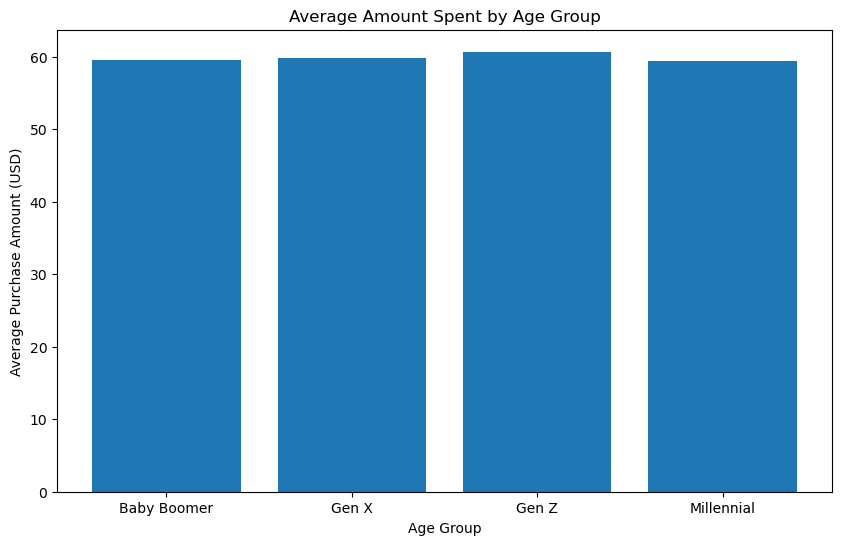

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(average_spent_by_age_group['Age Group'], average_spent_by_age_group["Purchase Amount (USD)"])
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Amount Spent by Age Group')
plt.show()

In [29]:
shopping_df["Age Group"].value_counts()

Age Group
Gen X          1272
Millennial     1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [34]:
### How frequently do specific age demographics shop? (bi-weekly, bi-monthly, ect)

In [32]:
shopping_frequency = shopping_df.pivot_table(index='Frequency of Purchases', columns='Age Group', aggfunc='size', fill_value=0)
shopping_frequency

Age Group,Baby Boomer,Gen X,Gen Z,Millennial
Frequency of Purchases,,,,
Annually,131,170,102,169
Bi-Weekly,99,184,99,165
Every 3 Months,113,185,100,186
Fortnightly,104,180,94,164
Monthly,105,189,80,179
Quarterly,128,185,89,161
Weekly,108,179,76,176


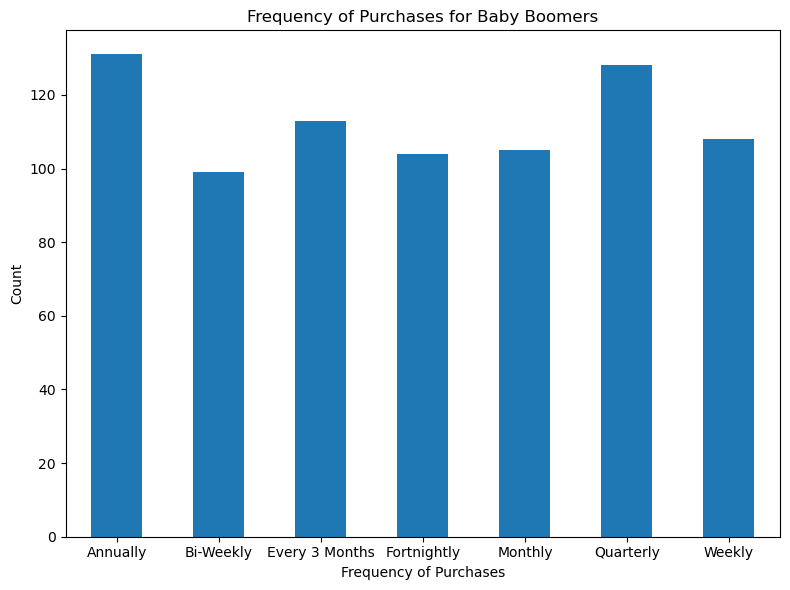

In [44]:
baby_boomer_data = shopping_frequency.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6))
baby_boomers_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Baby Boomers')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

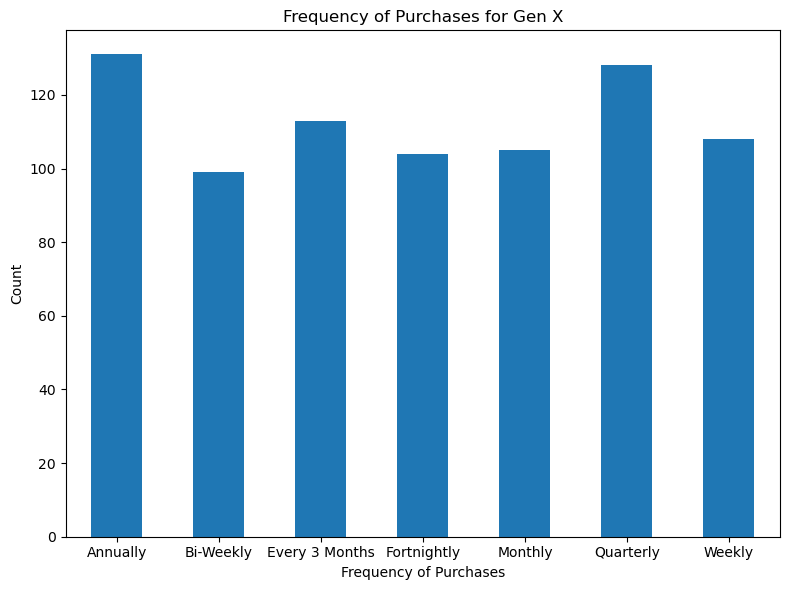

In [37]:
gen_x_data = shopping_frequency.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
baby_boomers_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen X')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

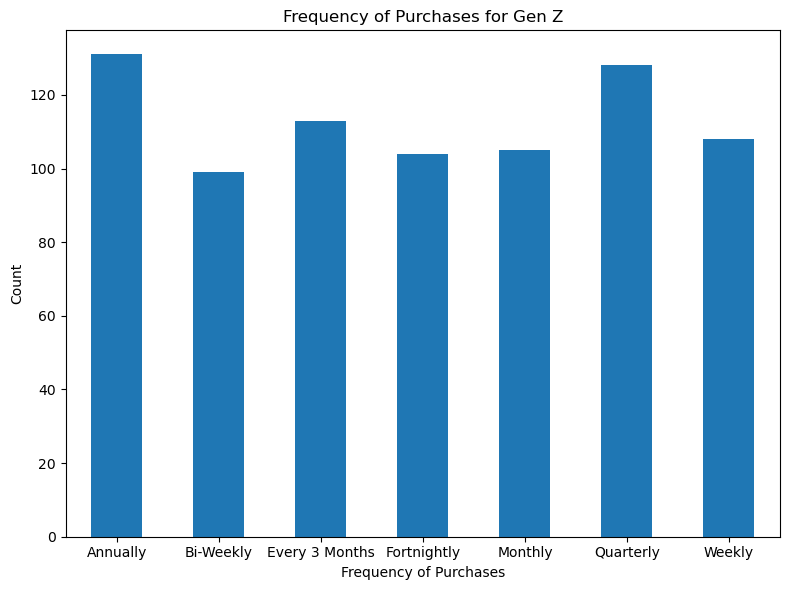

In [38]:
gen_z_data = shopping_frequency.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
baby_boomers_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen Z')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

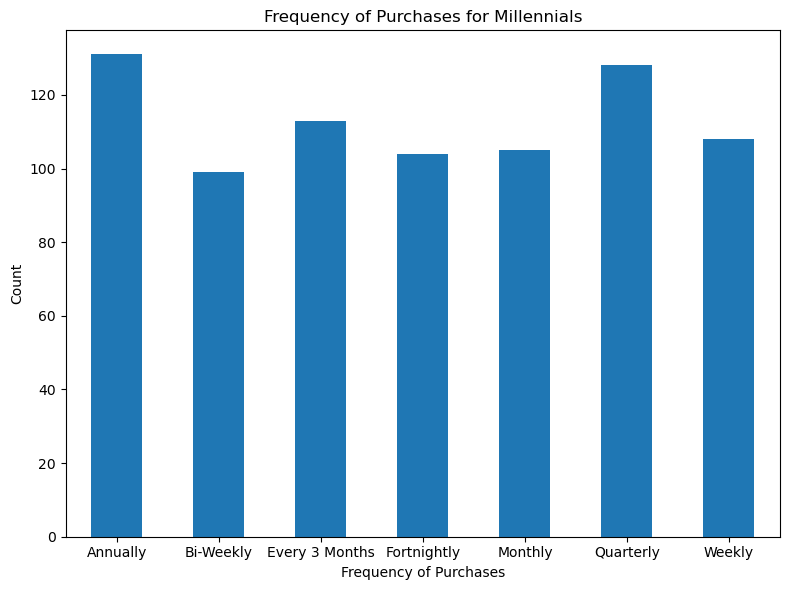

In [39]:
millennial_data = shopping_frequency.loc[:, 'Millennial']
plt.figure(figsize=(8, 6))
baby_boomers_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Millennials')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [41]:
frequency_counts = shopping_df['Frequency of Purchases'].value_counts().reset_index()
frequency_counts.columns = ['Frequency of Purchases', 'Count']
print(frequency_counts)

  Frequency of Purchases  Count
0         Every 3 Months    584
1               Annually    572
2              Quarterly    563
3                Monthly    553
4              Bi-Weekly    547
5            Fortnightly    542
6                 Weekly    539


In [ ]:
baby_boomers_df = shopping_df[shopping_df['Age Group'] == 'Baby Boomers']
baby_boomers_frequency_counts = baby_boomers_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(baby_boomers_frequency_counts, labels=baby_boomers_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Baby Boomers')
plt.show()